## pytorch 패키지 기본 구성

In [1]:
import torch 
'''메인 네임 스페이스
텐서 등의 다양한 수학 함수가 포함되어 있고, Numpy와 유사한 구조(함수명들이 거의 똑같음)'''

import torch.autograd
'''자동 미분을 위한 함수들이 포함
자동 미분의 on/off를 제어하는 콘텍스트 매니저(enable_grad/no_grad)나 
자체 미분 가능 함수를 정의할 때 사용하는 기반 클래스인 'Function' 등이 포함'''

import torch.nn
'''신경망을 구축하기 위한 다양한 데이터 구조나 레이어 등이 정의 
예를 들어 CNN, RNN, LSTM과 같은 레이어, ReLU와 같은 활성화 함수, MSELoss와 같은 손실 함수들이 있음.'''

import torch.optim
'''확률적 경사 하강법(Stochastic Gradient Descent, SGD)를 중심으로 한 
파라미터 최적화 알고리즘이 구현되어 있음.'''

import torch.utils.data
'''SGD의 반복 연산을 실행할 때 사용하는 미니 배치용 유틸리티 함수가 포함되어있음'''

import torch.onnx
'''ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용. 
ONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷.(잘 사용 안 함)'''

'ONNX(Open Neural Network Exchange)의 포맷으로 모델을 익스포트(export)할 때 사용. \nONNX는 서로 다른 딥 러닝 프레임워크 간에 모델을 공유할 때 사용하는 포맷.(잘 사용 안 함)'

## 텐서 조작하기(Tensor Manipulation) 1 

벡터, 행렬, 텐서의 개념에 대해서 이해하고, Numpy와 파이토치로 벡터,행렬,텐서를 다루는 방법에 대해서 이해.
*   **벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)**

*   **넘파이 훑어보기(Numpy Review)**

*   **파이토치 텐서 선언하기(PyTorch Tensor Allocation)**

*   **행렬 곱셈(Matrix Multiplication)**

*   **다른 오퍼레이션들(Other Basic Ops)**


### 1.2.1 벡터, 행렬 그리고 텐서(Vector, Matrix and Tensor)

**1) 벡터, 행렬, 텐서 그림으로 이해하기**


![대체 텍스트](https://wikidocs.net/images/page/52460/tensor1.PNG)

딥 러닝을 하게 되면 다루게 되는 가장 기본적인 단위는 벡터, 행렬, 텐서입니다. 차원이 없는 값을 스칼라(위의 그림에는 없음), 1차원으로 구성된 값을 우리는 벡터라고 합니다.

2차원으로 구성된 값을 행렬(Matrix)라고 합니다. 그리고 3차원이 되면 우리는 텐서(Tensor)라고 부릅니다. 사실 우리는 3차원의 세상에 살고 있으므로, 4차원 이상부터는 머리로 생각하기는 어렵습니다. 4차원은 3차원의 텐서를 위로 쌓아 올린 모습으로 상상해보겠습니다.

5차원은 그 4차원을 다시 옆으로 확장한 모습으로 생각해봅시다. 6차원은 5차원을 뒤로 확장한 모습으로 볼 수 있습니다.

---------------------
**2) PyTorch Tensor Shape Convention**

사실 딥 러닝을 할때 다루고 있는 행렬 또는 텐서의 크기를 고려하는 것은 항상 중요합니다. 여기서는 앞으로 행렬과 텐서의 크기를 표현할 때 다음과 같은 방법으로 표기합니다. 앞으로 다루게 될 텐서 중 가장 전형적인 2차원 텐서를 예로 들어볼까요?

* 2D Tensor(Typical Simple Setting)

> |t| = (Batch size, dim)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor2.PNG)

> 위의 경우는 2차원 텐서의 크기 |t|를 (batch size × dimension)으로 표현하였을 경우입니다. 조금 쉽게 말하면, 아래의 그림과 같이 행렬에서 행의 크기가 batch size(row), 열의 크기가 dim(column)이라는 의미입니다.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor3.PNG)


In [1]:
"""
2D Tensor 예시
iris dataset
"""
from sklearn.datasets import load_iris 
## 기본적 머신러닝 라이브러리 사이킷런에서 iris data를 가져옵니다

iris = load_iris()
print(iris.data.shape) ## row = 150, col = 5
iris['data'][:10]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

* 3D Tensor(Typical Computer Vision)
> |t| = (batch size, width, height)

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor4.PNG)

> 일반적으로 자연어 처리보다 비전 분야(이미지, 영상 처리)를 하시게 된다면 좀 더 복잡한 텐서를 다루게 됩니다. 이미지라는 것은 가로, 세로라는 것이 존재합니다. 그리고 여러 장의 이미지, 그러니까 batch size로 구성하게 되면 아래와 같이 3차원의 텐서가 됩니다.

![대체 텍스트](https://wikidocs.net/images/page/52460/tensor5.PNG)

> 위의 그림은 세로는 batch size, 가로는 너비(width), 그리고 안쪽으로는 높이(height)가 되는 것을 보여줍니다.


In [23]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

(1797, 8, 8)


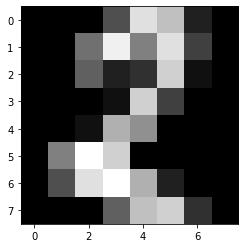

In [3]:
"""
3D Tensor 예시(Computer vision)
digits(mnist와 비슷) dataset
"""

mnist = load_digits()
print(mnist['images'].shape)
plt.imshow(mnist['images'][50],cmap='gray')
plt.show()

In [4]:
mnist.target[50]

2

In [5]:
"""
3D Tensor 예시(Typical Natural Language Processing)
"""
sentences = ['나는 사과를 좋아해','나는 바나나를 좋아해','나는 사과를 싫어해','나는 바나나를 싫어해']
word_sentences = [x.split(' ') for x in sentences]
print(word_sentences)

my_bow = {'나는':[0.1, 0.2, 0.9],'사과를':[0.3, 0.5, 0.1],'좋아해':[0.3, 0.5, 0.2],'바나나를':[0.7, 0.6, 0.5],'싫어해':[0.5, 0.6, 0.7]}
word2vec = [[my_bow[word] for word in sentence] for sentence in word_sentences]
print(word2vec) ## 4x3x3짜리 텐서

[['나는', '사과를', '좋아해'], ['나는', '바나나를', '좋아해'], ['나는', '사과를', '싫어해'], ['나는', '바나나를', '싫어해']]
[[[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.3, 0.5, 0.2]], [[0.1, 0.2, 0.9], [0.3, 0.5, 0.1], [0.5, 0.6, 0.7]], [[0.1, 0.2, 0.9], [0.7, 0.6, 0.5], [0.5, 0.6, 0.7]]]


### 1.2.2 넘파이로 텐서 만들기(벡터와 행렬 만들기)

Pytorch로 텐서를 만들어보기 전에 우선 Numpy로 텐서를 만들어 보겠습니다. 우선 numpy를 불러옵니다

In [20]:
import numpy as np

#### 1차원 벡터


In [7]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print(t)

print("Rank of t: ", t.ndim) #몇 차원인지 출력
print("Shape of t: ", t.shape) #크기 출력

[0. 1. 2. 3. 4. 5. 6.]
Rank of t:  1
Shape of t:  (7,)


#### 2차원 행렬

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


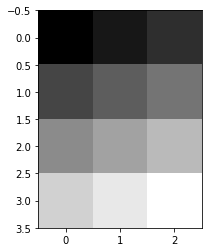

Rank  of t:  2
Shape of t:  (4, 3)


In [8]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)

plt.imshow(t,cmap='gray')
plt.show()

print('Rank  of t: ', t.ndim)
print('Shape of t: ', t.shape)

### 1.2.3 파이토치 텐서 선언하기

#### 1차원 벡터

In [2]:
t = torch.tensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

# dim() : 현재 텐서의 차원 보여줌
# shape, size() : 크기
print(t.dim()) # rank, 차원
print(t.shape) #shape
print(t.size()) #shape

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])


In [3]:
print(t[0], t[1], t[-1])  # 인덱스로 접근
print(t[2:5], t[4:-1])    # 슬라이싱
print(t[:2], t[3:])       # 슬라이싱

tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


#### 2차원 행렬

In [7]:
t = torch.tensor([[1., 2., 3.],
                  [4., 5., 6.],
                  [7., 8., 9.],
                  [10.,11.,12.]])
print(t)

print(t.dim())  # rank (차원)
print(t.size()) # shape

print(t[:, 1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원의 첫번째 것만 가져온다.
print(t[:, 1].size()) # ↑ 위의 경우의 크기


print(t[:, :-1]) # 첫번째 차원을 전체 선택한 상황에서 두번째 차원에서는 맨 마지막에서 첫번째를 제외하고 다 가져온다.

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


#### 브로드캐스팅(Broadicasting)

In [8]:
# 같은 크기일 때는 문제 없이 덧셈 연산 가능
m1 = torch.tensor([[3., 3.]])
m2 = torch.tensor([[2., 2.]])
print(m1 + m2)

# Vector + Scalar (브로드캐스팅)
m1 = torch.tensor([[1., 2]])
m2 = torch.tensor([3]) # [3] -> [3, 3]
print(m1 + m2)

# 브로드캐스팅이 안되는 경우
m1 = torch.FloatTensor([[1, 2],[3,4]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)

m1 = torch.FloatTensor([[1, 2],[3, 4],[5, 6]])
m2 = torch.FloatTensor([[3], [4]])
print(m1 + m2)


tensor([[5., 5.]])
tensor([[4., 5.]])
tensor([[4., 5.],
        [7., 8.]])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

#### 행렬곱셈(.matmul) 

In [9]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1.matmul(m2)) # 2 x 1

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[ 5.],
        [11.]])


#### 원소 별 곱셈(.mul)

In [10]:
m1 = torch.FloatTensor([[1, 2], [3, 4]])
m2 = torch.FloatTensor([[1], [2]])
print('Shape of Matrix 1: ', m1.shape) # 2 x 2
print('Shape of Matrix 2: ', m2.shape) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2))

Shape of Matrix 1:  torch.Size([2, 2])
Shape of Matrix 2:  torch.Size([2, 1])
tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


#### 평균 (Mean)
- dim=0 : 첫 번째 차원 (행을 제거하고 열을 남김)
- dim=1 : 두 번째 차원 (열을 제거하고 행을 남김)

In [14]:
t1 = torch.FloatTensor([1, 2])
print(t1.mean())

t2 = torch.FloatTensor([[1, 2], [3, 4]])
print(t2.mean())

print(t2.mean(dim=0))
print(t2.mean(dim=1))

tensor(1.5000)
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


#### 덧셈(Sum)

In [15]:
t = torch.FloatTensor([[3, 2], [1, 4]])
print(t)

print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 행을 제거
print(t.sum(dim=1)) # 열을 제거
print(t.sum(dim=-1)) # 열을 제거

tensor([[3., 2.],
        [1., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([5., 5.])
tensor([5., 5.])


#### 최대(Max) & 아그맥스(ArgMax)
- Max : 원소의 최대값
- ArgMax : 최대값을 가진 인덱스를 리턴
- max에 dim인자를 주면 argmax도 함께 리턴됨

In [16]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

print(t.max()) # Returns one value: max

print(t.max(dim=0)) # Returns two values: max and argmax

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))


In [17]:
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])


In [18]:
print(t.max(dim=1))
print('-'*25)
print(t.max(dim=-1))

torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
-------------------------
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))


### 1.3 텐서 조작하기

### 1.3.1 뷰(View) - 원소의 수를 유지하면서 텐서의 크기 변경

- 파이토치 텐서의 뷰(View)는 넘파이에서의 리쉐이프(Reshape)와 같은 역할.
- 텐서의 크기(Shape)를 변경해주는 역할

In [21]:
t = np.array([[[0, 1, 2],
               [3, 4, 5]],
              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

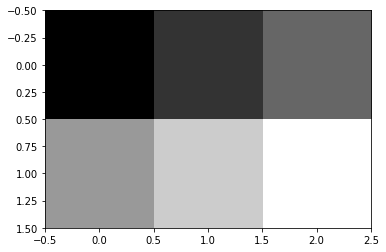

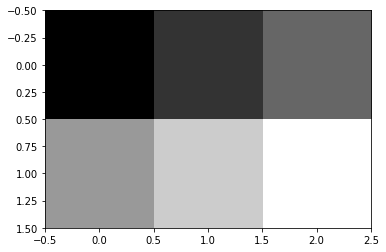

torch.Size([2, 2, 3])


In [25]:
for image in t:
    plt.imshow(image,cmap='gray')
    plt.show()
    
print(ft.shape)

현재 위 텐서의 크기는 (2, 2, 3)입니다.

![대체 텍스트](https://wikidocs.net/images/page/52846/tensor1.PNG)

#### 3차원 텐서 --> 2차원 텐서로 변경

In [26]:
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


*   view는 기본적으로 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 합니다.
*   파이토치의 view는 사이즈가 -1로 설정되면 다른 차원으로부터 해당 값을 유추합니다.

변경 전 텐서의 원소의 수는 (2 × 2 × 3) = 12개였습니다. 그리고 변경 후 텐서의 원소의 개수 또한 (4 × 3) = 12개였습니다.


#### 3차원 텐서의 크기변경

차원은 유지하되, shape바꾸기  
(2 X 2 X 3) --> (? X 1 X 3)

In [27]:
print(ft.view([-1, 1, 3]))
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


#### 1.3.2 스퀴즈(Squeeze) - 1인 차원을 제거

In [28]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [29]:
# (3x1) --> (3,)
print(ft.squeeze())
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


#### 1.3.3 언스퀴즈(Unsqueeze) - 특정 위치에 1인 차원 추가

In [30]:
ft = torch.Tensor([0, 1, 2]) # (3,)
print(ft.shape)

print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape) # (1,3)

torch.Size([3])
tensor([[0., 1., 2.]])
torch.Size([1, 3])


#### unsqueeze는 view로도 구현 가능!

In [31]:
print(ft.view(1, -1))
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


#### 1.3.4 타입 캐스팅 (Type Casting)

![대체 텍스트](https://wikidocs.net/images/page/52846/newimage.png)

텐서에는 자료형이라는 것이 있습니다. 각 데이터형별로 정의되어져 있는데, 예를 들어 32비트의 유동 소수점은 torch.FloatTensor를, 64비트의 부호 있는 정수는 torch.LongTensor를 사용합니다. GPU 연산을 위한 자료형도 있습니다. 예를 들어 torch.cuda.FloatTensor가 그 예입니다.

그리고 이 자료형을 변환하는 것을 타입 캐스팅이라고 합니다.

우선 실습을 위해 long 타입의 lt라는 텐서를 선언합니다.

In [32]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

print(lt.float())

tensor([1, 2, 3, 4])
tensor([1., 2., 3., 4.])


In [33]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

print(bt.long())
print(bt.float())

tensor([1, 0, 0, 1], dtype=torch.uint8)
tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


#### 1.3.5 두 텐서 연결하기
딥 러닝에서는 주로 모델의 입력 또는 중간 연산에서 두 개의 텐서를 연결하는 경우가 많습니다. 두 텐서를 연결해서 입력으로 사용하는 것은 두 가지의 정보를 모두 사용한다는 의미를 가지고 있습니다.

In [34]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

torch.cat : 어느 차원을 늘릴 것인지를 인자로 줄 수 있음.

In [36]:
print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


#### 1.3.6 스택킹(Stacking)
연결(concatenate)을 하는 또 다른 방법으로 스택킹(Stacking)이 있습니다. 스택킹은 영어로 쌓는다는 의미입니다. 때로는 연결을 하는 것보다 스택킹이 더 편리할 때가 있는데, 이는 스택킹이 많은 연산을 포함하고 있기 때문입니다.

In [37]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [38]:
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


x, y, z는 기존에는 전부 (2,)의 크기를 가졌습니다. 그런데 .unsqueeze(0)을 하므로서 3개의 벡터는 전부 (1, 2)의 크기의 2차원 텐서로 변경됩니다. 여기에 연결(concatenate)를 의미하는 cat을 사용하면 (3 x 2) 텐서가 됩니다.

In [39]:
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [40]:
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


#### 1.3.7 zeros_like와 ones_like : 0으로 채워진 텐서와 1로 채워진 텐서

In [41]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [42]:
print(torch.ones_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 1로 채우기

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [43]:
print(torch.zeros_like(x)) # 입력 텐서와 크기를 동일하게 하면서 값을 0으로 채우기

tensor([[0., 0., 0.],
        [0., 0., 0.]])


#### 1.3.8 In-place Operation(덮어쓰기 연산)

연산 뒤에 _를 붙이면 기존의 값을 덮어쓰기 함  
예) x.mul_(2.)

In [44]:
x = torch.FloatTensor([[1, 2], [3, 4]])

In [45]:
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력
print(x) # 기존의 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 2.],
        [3., 4.]])


In [46]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력
print(x)  # 변경된 값 출력

tensor([[2., 4.],
        [6., 8.]])
tensor([[2., 4.],
        [6., 8.]])
